このPython コードは、PyMC を使ってMCMCサンプリングを行います。
* 2025年8月時点では、Google Colaboratory環境では PyMC がそのまま使えますので、実行可能です。
* ローカルな計算機環境では、PyMC パッケージが含まれていないのが一般的です。
    * 例えば、Anaconda などの Distribution では、以下の例の様に、PyMC環境を用意する必要があります。
        ```
        conda create -c conda-forge -n pymc_env pymc
        conda activate pymc_env
        conda install conda-forge::ipywidgets
        conda install scikit-learn
        ```
        * これで VS codeの実行時のPython環境に、```pymc_env```を選択します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2Prior-060102Normal/'
FileBaseName = '2Prior-060102Normal'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
# https://docs.pymc.io/
import pymc as pm
import time
print('pymc       Ver.', pm.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.10.0
numpy      Ver. 1.26.4


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc       Ver. 5.16.1
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060102Normal/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060102Normal/


---
正規分布
$$
{\rm PNormal}(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}
\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
\;\;\;
x\in[-\infty,\infty]
$$

In [4]:
############################################
sqrt2pi = np.sqrt( 2 * np.pi )
############################################
# ##1. 正規分布
def PNormal(x, mu, sigma):
  return np.exp( - (x - mu)**2 / (2*sigma**2) ) / (sigma * sqrt2pi )

In [5]:
############################################
xx = np.linspace(-100,+100,num=201)
PNormal1 = PNormal(xx, 0, 20)

PyMCで用いる正規分布の例

In [6]:
############################################
with pm.Model() as  model:
    alpha = pm.Normal('alpha', mu=0, sigma=20 )
    Normal1 = pm.draw( alpha, draws=100000)

In [7]:
############################################
Normal1_mean = np.mean( Normal1 )
Normal1_std  = np.std( Normal1 )
print('Normal1_mean = ', '%10.6f' % Normal1_mean )
print('Normal1_std  = ', '%10.6f' % Normal1_std )

Normal1_mean =    0.019520
Normal1_std  =   20.028140


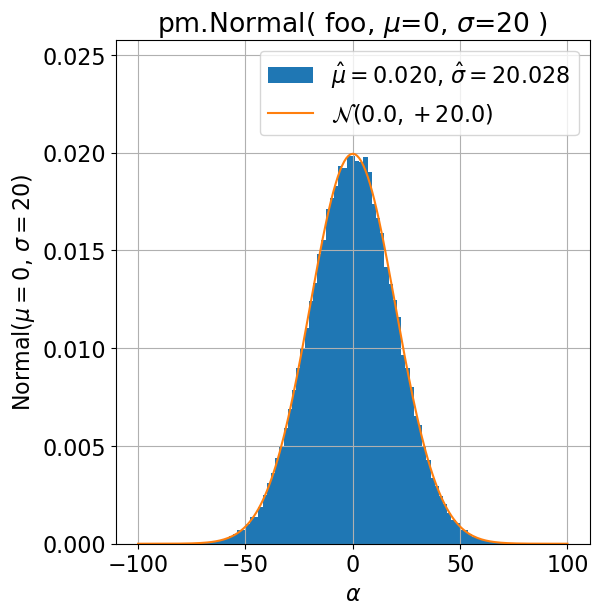

d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060102Normal/2Prior-060102Normal.pdf


In [8]:
############################################
x_lim  = max( np.abs(np.amax(Normal1)),
              np.abs(np.amin(Normal1)) )
############################################
plt.rcParams['font.size'] = 16
#
fig = plt.figure( figsize=(6,6) )
fig.subplots_adjust(left=0.18, right=0.97,
                    top=0.94, bottom=0.1)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\alpha$')
ax1.set_xlim( -x_lim, +x_lim )
ax1.set_ylabel(
    r'Normal($\mu=0$, $\sigma=20$)')
(x_left, x_right) = ax1.set_xlim((-x_lim,
                                  +x_lim))
#
bin_values, bins, patches = ax1.hist(
        Normal1,
        bins=100, density=True,
        label=r'$\hat{\mu}=%.3f$, $\hat{\sigma}=%.3f$'
        % (Normal1_mean, Normal1_std))
#
bin_values_max = np.amax( bin_values )
#
(y_bot, y_top) = ax1.set_ylim((0,bin_values_max * 1.3))
#
ax1.plot(xx, PNormal1, label=r'$\mathcal{N}(0.0,+20.0)$' )
#
plt.title(
    r'pm.Normal( foo, $\mu$=0, $\sigma$=20 )')
#
plt.legend()
#
plt.grid(True)
#
plt.show()
#
######################################
pdfName = FilePath + FileBaseName + '.pdf'
fig.savefig( pdfName )
print( pdfName )